In [1]:
# supress Warnings
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# Importing the datasets
country_data = pd.read_csv("Country-data.csv")
country_data.reset_index(level=0, inplace=True)
country_data.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Inspecting the file
print(country_data.shape)
print(country_data.describe())
print(country_data.info())
print(country_data.columns)

(167, 11)
           index  child_mort     exports      health     imports  \
count  167.00000  167.000000  167.000000  167.000000  167.000000   
mean    83.00000   38.270060   41.108976    6.815689   46.890215   
std     48.35287   40.328931   27.412010    2.746837   24.209589   
min      0.00000    2.600000    0.109000    1.810000    0.065900   
25%     41.50000    8.250000   23.800000    4.920000   30.200000   
50%     83.00000   19.300000   35.000000    6.320000   43.300000   
75%    124.50000   62.100000   51.350000    8.600000   58.750000   
max    166.00000  208.000000  200.000000   17.900000  174.000000   

              income   inflation  life_expec   total_fer           gdpp  
count     167.000000  167.000000  167.000000  167.000000     167.000000  
mean    17144.688623    7.781832   70.555689    2.947964   12964.155689  
std     19278.067698   10.570704    8.893172    1.513848   18328.704809  
min       609.000000   -4.210000   32.100000    1.150000     231.000000  
25%    

In [5]:
# checking for duplicate values

sum(country_data.duplicated(subset = "country")) == 0

True

In [6]:
#finding the sum of Null values in each column and also if there is any Null values in the dataframe

print (country_data.isnull().sum())  
print (country_data.isnull().values.any())
print (country_data.isnull().values.sum())

index         0
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
False
0


In [7]:
#copying the attributes that need to be clustered
df_cluster = country_data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']].copy()
df_cluster.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Scaling the data


In [8]:
# standardise all parameters
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
cluster_norm = standard_scaler.fit_transform(df_cluster)

In [9]:
#putting it to a Dataframe name "cluster_norm"
cluster_norm = pd.DataFrame(cluster_norm)
cluster_norm.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
cluster_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [10]:
cluster_norm.shape

(167, 9)

### PCA on the dataset

In [11]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [12]:
#Doing the PCA on the data
pca.fit(cluster_norm)

PCA(random_state=42, svd_solver='randomized')

In [13]:
#Principal Components formed after doing PCA on the dataset
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

#### Plotting Original Features on the first 2 Principal Component  

In [14]:
#putting the PCA and original features into "pcs_df" dataframe
colnames = list(cluster_norm.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income


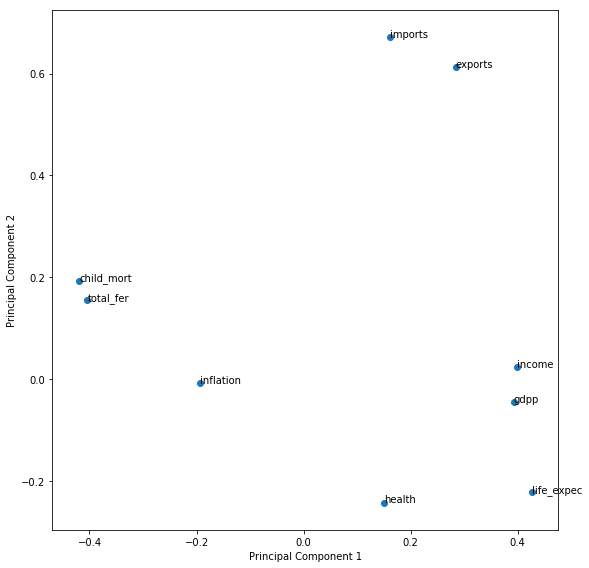

In [15]:
#plotting the in a scatter plot
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### We see that "income", "gdpp" & "life_expec" varialbes are high on PC1 and "exports" & "imports" are high on PC2 
<br>
<br>

In [16]:
#variance ratio among the PCs formed
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

#### Looking at the screeplot to assess the number of needed principal components

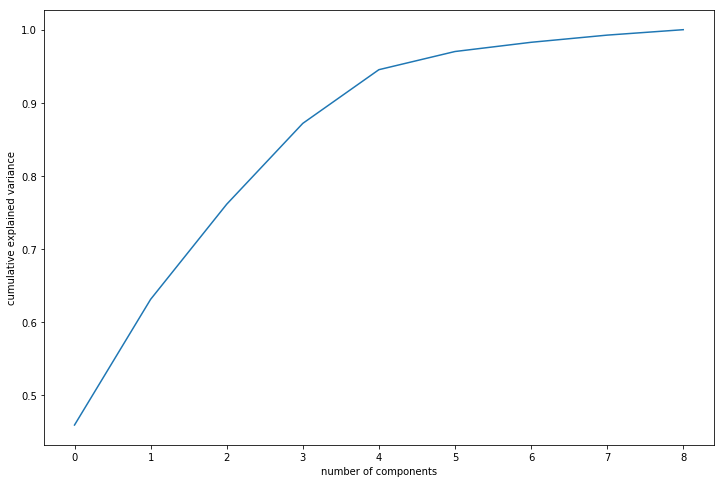

In [17]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 5 components are enough to describe 95% of the variance in the dataset
- We'll choose 5 components for our modeling

In [18]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

#### Basis transformation - getting the data onto our PCs

In [19]:
df_pca = pca_final.fit_transform(cluster_norm)
df_pca.shape

(167, 5)

#### Creating correlation matrix for the principal components 

In [20]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

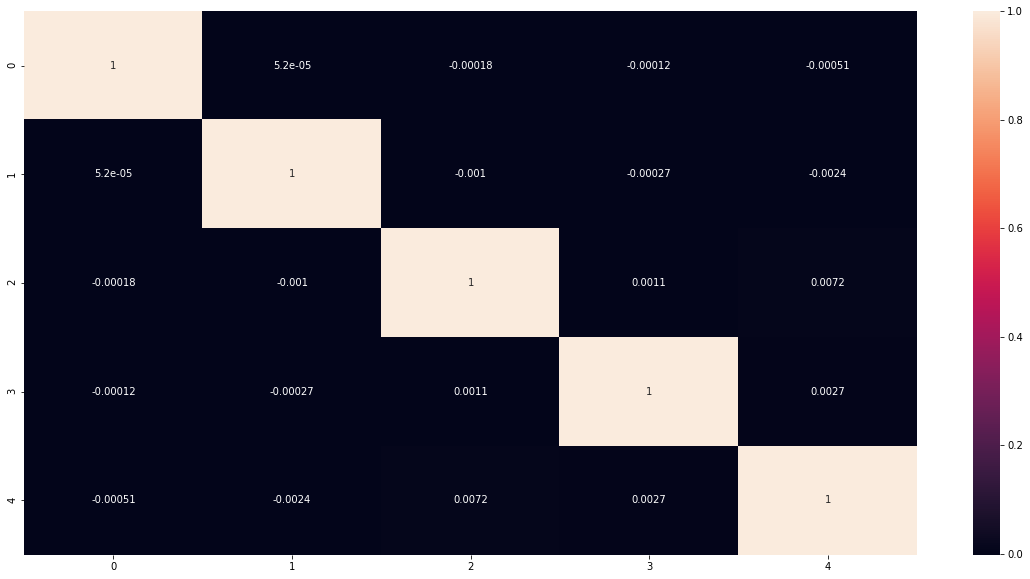

In [21]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [22]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.007194543060489871 , min corr:  -0.0023747044974955817


#### The max and min is aprox equals to zero
- Hence removed multicollinearity from the situation, and the models will be much more stable

In [23]:
#Converting the array into Dataframe
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [24]:
df_pca.shape

(167, 5)

## Outliers

In [25]:
#df_pca.describe()

In [26]:
#low = .0
#high = .92
#quant_df = df_pca.quantile([low, high])
#print(quant_df)

In [27]:
#df_pca = df_pca.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)

In [28]:
#df_pca.dropna(inplace=True)
#print(df_pca.head())

In [29]:
#df_pca.describe()

In [30]:
#df_pca.shape

### Hopkins Statistics

In [31]:
#importing the necessary package
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
hopkins(df_pca)

0.8814964700267442

#### - If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.
<br>
So it looks good to form high tendency to cluster

## K-Means Clustering
<br>
#### K-Means with K=5

In [33]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(df_pca)

KMeans(max_iter=50, n_clusters=5)

### Silhouette Analysis

In [34]:
#importing the package
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

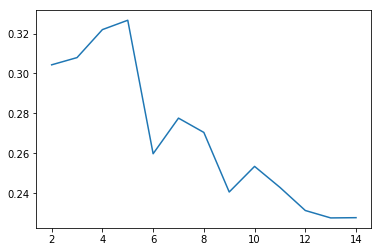

In [35]:
#plotting the Silhouette curve
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

Looks like between 3 & 5 the value of K should be

### Sum of Squared Distances

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


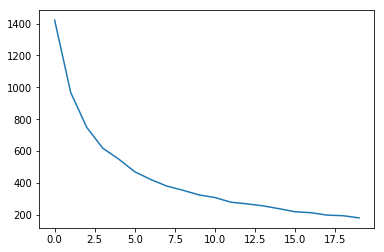

In [36]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

The curve also indicates similar result between 3 to 5

#### Analysis of the Cluster

In [37]:
# analysis of clusters formed
country_data.index = pd.RangeIndex(len(country_data.index))
cluster_km5 = pd.concat([country_data, pd.Series(model_clus5.labels_)], axis=1)
cluster_km5.columns = ['index','country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusterId']

In [38]:
cluster_km5.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterId
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


#### Visualizing the Data with the clusters formed

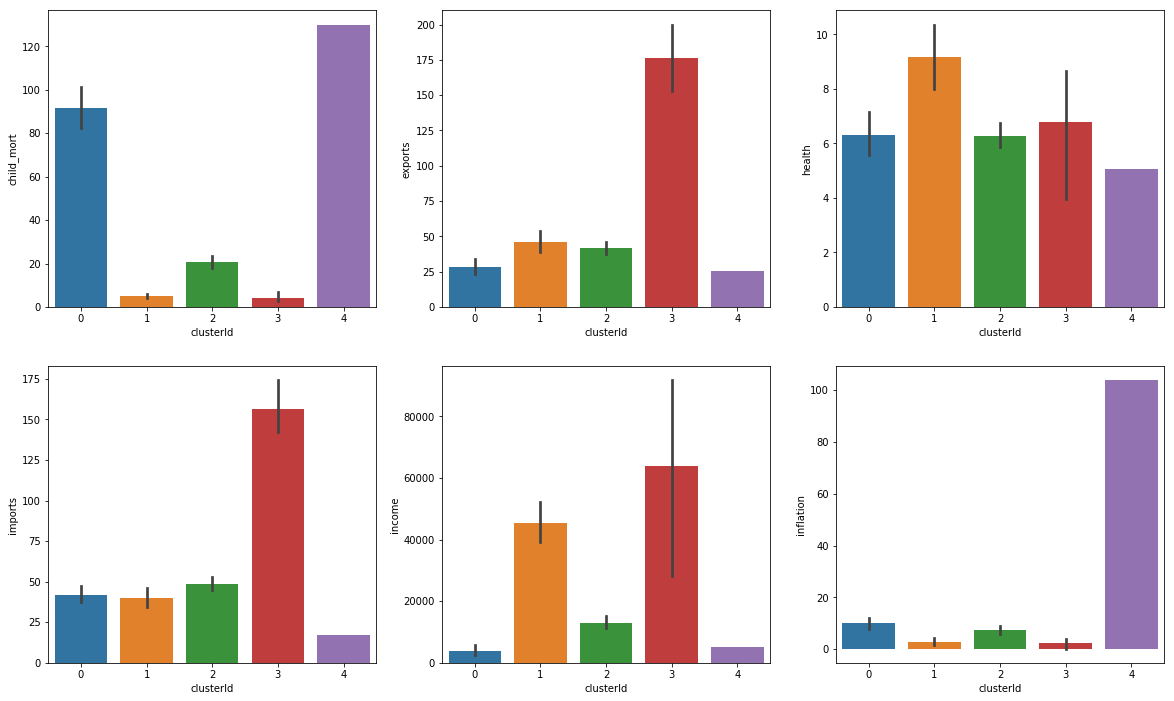

In [39]:
# Create subplots(By default Average)
# increase figure size 
plt.figure(figsize=(20, 12))
# subplot 1
plt.subplot(2, 3, 1)
sns.barplot(x='clusterId', y='child_mort', data=cluster_km5)
# subplot 2
plt.subplot(2, 3, 2)
sns.barplot(x='clusterId', y='exports', data=cluster_km5)
# subplot 3
plt.subplot(2, 3, 3)
sns.barplot(x='clusterId', y='health', data=cluster_km5)
# subplot 4
plt.subplot(2, 3, 4)
sns.barplot(x='clusterId', y='imports', data=cluster_km5)
# subplot 5
plt.subplot(2, 3, 5)
sns.barplot(x='clusterId', y='income', data=cluster_km5)
# subplot 6
plt.subplot(2, 3, 6)
sns.barplot(x='clusterId', y='inflation', data=cluster_km5)
plt.show()

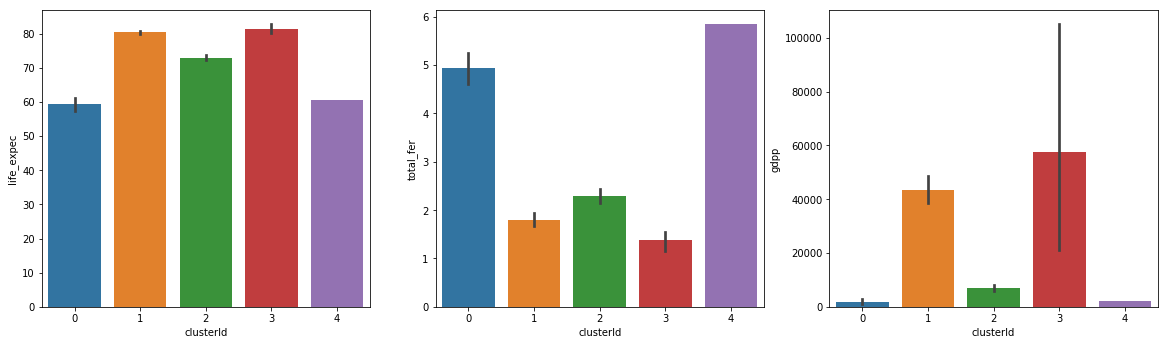

In [40]:
# Create subplots(By default Average)
# increase figure size 
plt.figure(figsize=(20, 12))
# subplot 1
plt.subplot(2, 3, 1)
sns.barplot(x='clusterId', y='life_expec', data=cluster_km5)
# subplot 2
plt.subplot(2, 3, 2)
sns.barplot(x='clusterId', y='total_fer', data=cluster_km5)
# subplot 3
plt.subplot(2, 3, 3)
sns.barplot(x='clusterId', y='gdpp', data=cluster_km5)
plt.show()

#### Filtering out the Data among the Clusters Formed 

In [41]:
Filter_0_5 = cluster_km5[cluster_km5['clusterId'].isin(['0'])]
Filter_1_5 = cluster_km5[cluster_km5['clusterId'].isin(['1'])]
Filter_2_5 = cluster_km5[cluster_km5['clusterId'].isin(['2'])]
Filter_3_5 = cluster_km5[cluster_km5['clusterId'].isin(['3'])]
Filter_4_5 = cluster_km5[cluster_km5['clusterId'].isin(['4'])]

In [42]:
print(Filter_0_5.shape)
print(Filter_1_5.shape)
print(Filter_2_5.shape)
print(Filter_3_5.shape)
print(Filter_4_5.shape)

(47, 12)
(30, 12)
(86, 12)
(3, 12)
(1, 12)


Based on the visualization above Cluster 1 stands out based on the key attributes 'child_mort', 'exports', 'income', 'life_expec' and 'gdpp' which are also the key PCs as shown in the scatter plot

In [43]:
Plot20_5 = Filter_1_5.head(20)

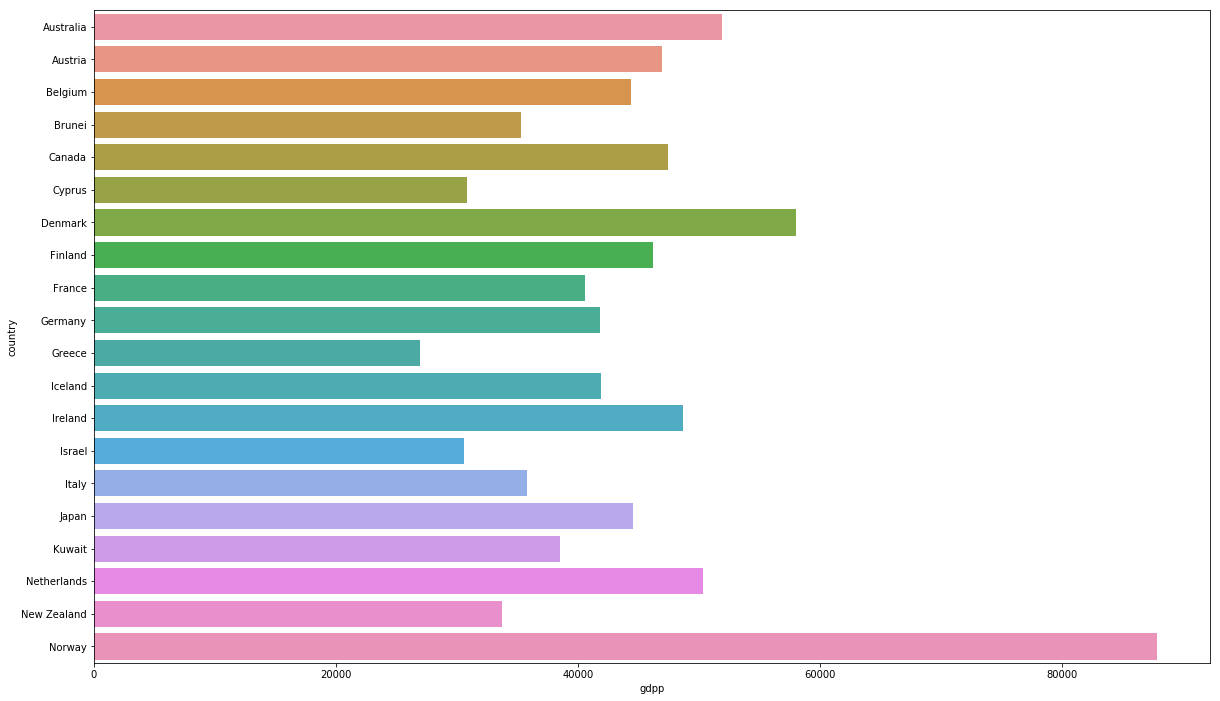

In [44]:
plt.figure(figsize=(20, 12))
sns.barplot(x='gdpp', y='country', data=Plot20_5)
plt.show()

#### K-Means with K=4

In [45]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(df_pca)

KMeans(max_iter=50, n_clusters=4)

#### Analysis of the Cluster

In [46]:
# analysis of clusters formed
country_data.index = pd.RangeIndex(len(country_data.index))
cluster_km4 = pd.concat([country_data, pd.Series(model_clus4.labels_)], axis=1)
cluster_km4.columns = ['index','country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusterId']
cluster_km4.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterId
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


#### Visualizing the Data with the clusters formed

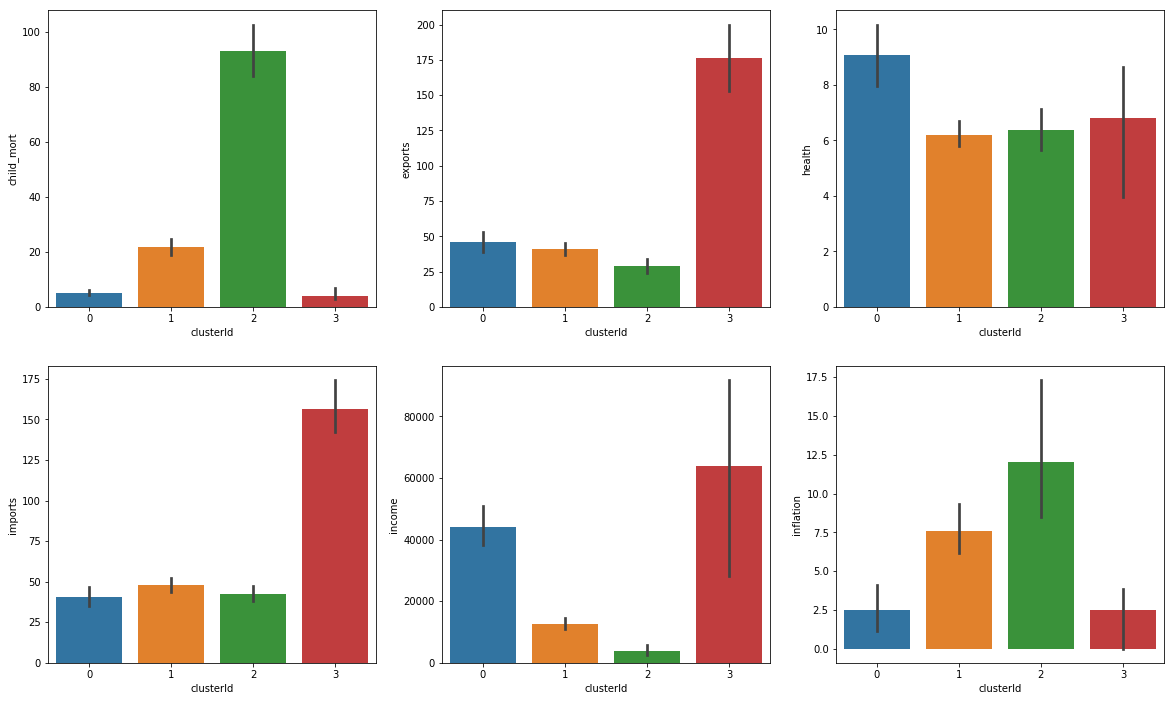

In [47]:
# Create subplots(By default Average)
# increase figure size 
plt.figure(figsize=(20, 12))
# subplot 1
plt.subplot(2, 3, 1)
sns.barplot(x='clusterId', y='child_mort', data=cluster_km4)
# subplot 2
plt.subplot(2, 3, 2)
sns.barplot(x='clusterId', y='exports', data=cluster_km4)
# subplot 3
plt.subplot(2, 3, 3)
sns.barplot(x='clusterId', y='health', data=cluster_km4)
# subplot 4
plt.subplot(2, 3, 4)
sns.barplot(x='clusterId', y='imports', data=cluster_km4)
# subplot 5
plt.subplot(2, 3, 5)
sns.barplot(x='clusterId', y='income', data=cluster_km4)
# subplot 6
plt.subplot(2, 3, 6)
sns.barplot(x='clusterId', y='inflation', data=cluster_km4)
plt.show()

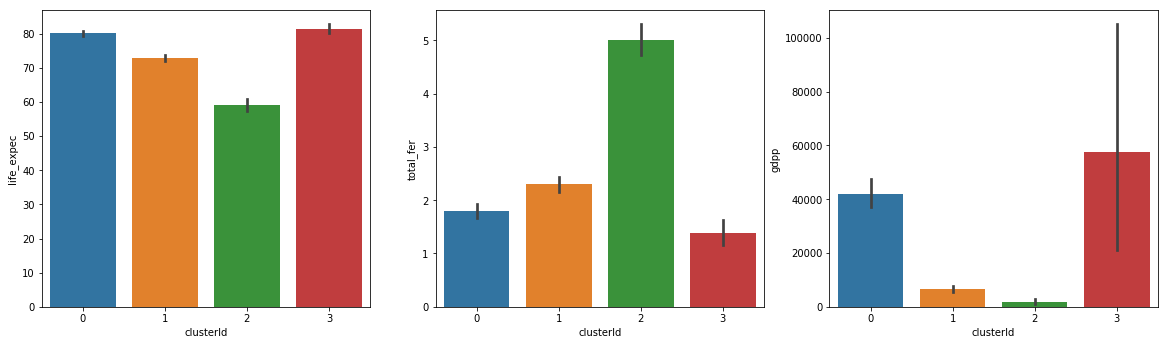

In [48]:
# Create subplots(By default Average)
# increase figure size 
plt.figure(figsize=(20, 12))
# subplot 1
plt.subplot(2, 3, 1)
sns.barplot(x='clusterId', y='life_expec', data=cluster_km4)
# subplot 2
plt.subplot(2, 3, 2)
sns.barplot(x='clusterId', y='total_fer', data=cluster_km4)
# subplot 3
plt.subplot(2, 3, 3)
sns.barplot(x='clusterId', y='gdpp', data=cluster_km4)
plt.show()

#### Filtering out the Data among the Clusters Formed

In [49]:
Filter_0_4 = cluster_km4[cluster_km4['clusterId'].isin(['0'])]
Filter_1_4 = cluster_km4[cluster_km4['clusterId'].isin(['1'])]
Filter_2_4 = cluster_km4[cluster_km4['clusterId'].isin(['2'])]
Filter_3_4 = cluster_km4[cluster_km4['clusterId'].isin(['3'])]

In [50]:
print(Filter_0_4.shape)
print(Filter_1_4.shape)
print(Filter_2_4.shape)
print(Filter_3_4.shape)

(32, 12)
(85, 12)
(47, 12)
(3, 12)


Based on the visualization above Cluster 1 stands out based on the key attributes 'child_mort', 'exports', 'income', 'life_expec', 'gdpp', 'health' which are also the key PCs as shown in the scatter plot

In [51]:
Plot20_4 = Filter_1_4.head(20)

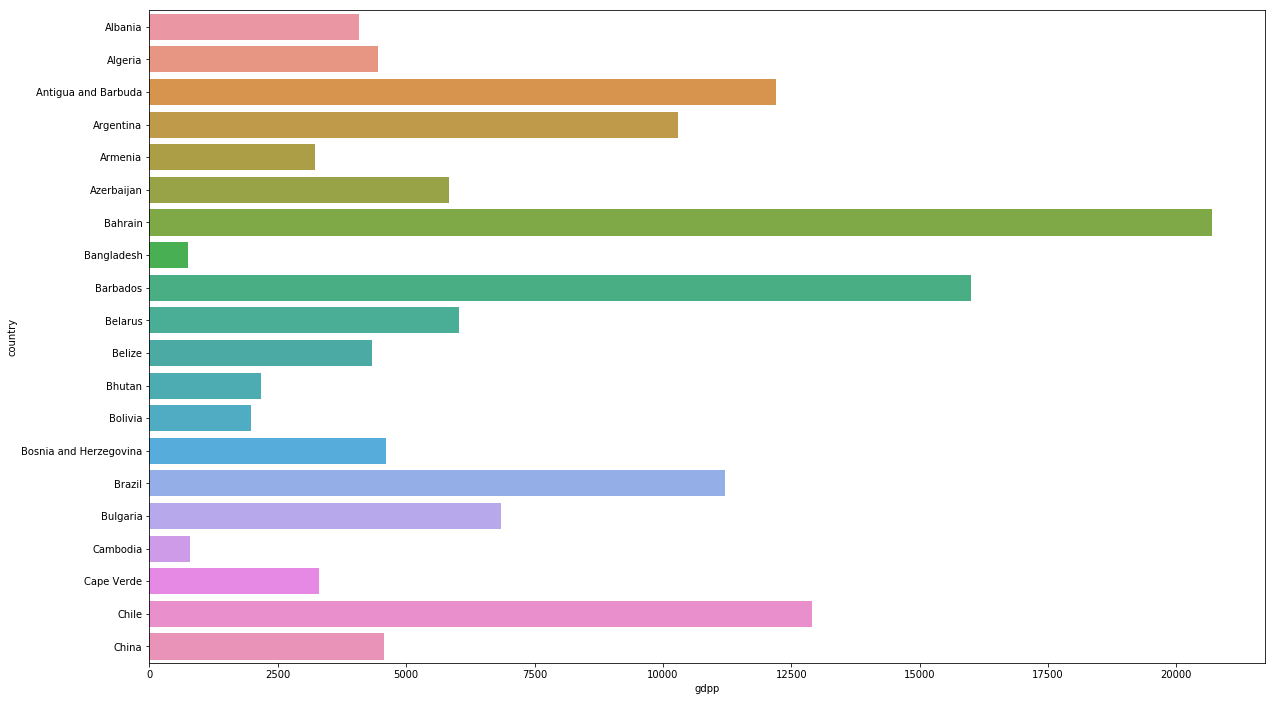

In [52]:
plt.figure(figsize=(20, 12))
sns.barplot(x='gdpp', y='country', data=Plot20_4)
plt.show()

#### K-Means with K=3

In [53]:
# Kmeans with K=3
model_clus3 = KMeans(n_clusters = 3, max_iter=50)
model_clus3.fit(df_pca)

KMeans(max_iter=50, n_clusters=3)

#### Analysis of the Cluster

In [54]:
# analysis of clusters formed
country_data.index = pd.RangeIndex(len(country_data.index))
cluster_km3 = pd.concat([country_data, pd.Series(model_clus3.labels_)], axis=1)
cluster_km3.columns = ['index','country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusterId']
cluster_km3.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterId
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


#### Visualizing the Data with the clusters formed

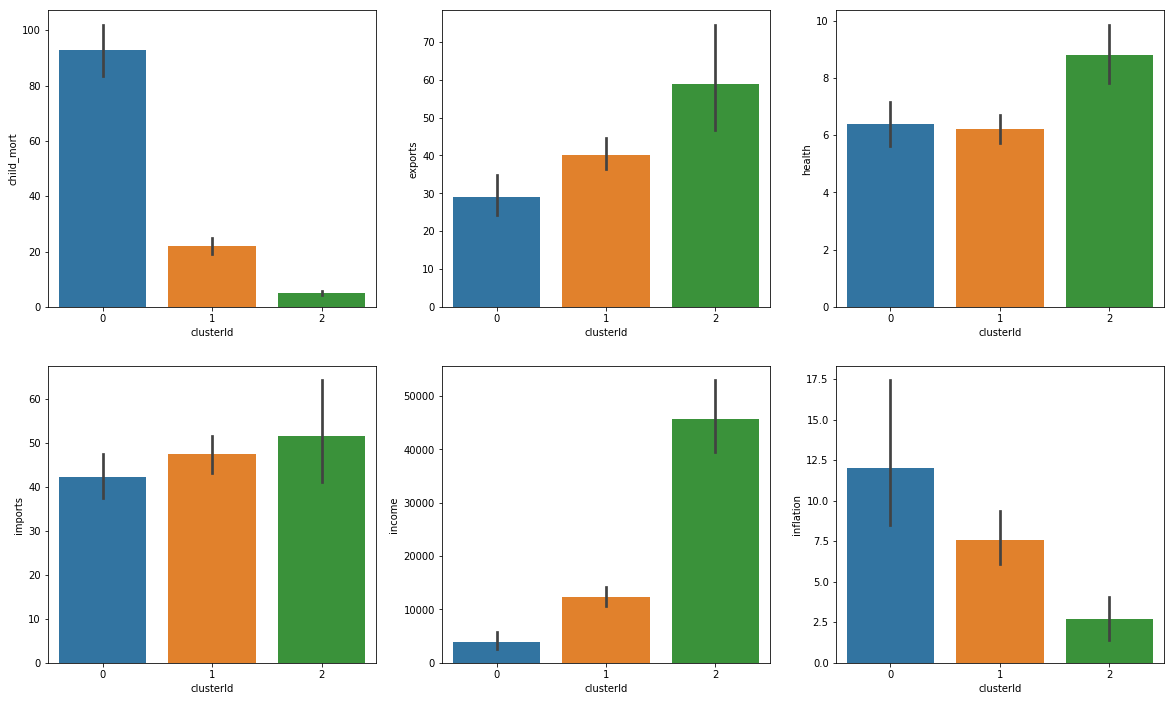

In [55]:
# Create subplots(By default Average)
# increase figure size 
plt.figure(figsize=(20, 12))
# subplot 1
plt.subplot(2, 3, 1)
sns.barplot(x='clusterId', y='child_mort', data=cluster_km3)
# subplot 2
plt.subplot(2, 3, 2)
sns.barplot(x='clusterId', y='exports', data=cluster_km3)
# subplot 3
plt.subplot(2, 3, 3)
sns.barplot(x='clusterId', y='health', data=cluster_km3)
# subplot 4
plt.subplot(2, 3, 4)
sns.barplot(x='clusterId', y='imports', data=cluster_km3)
# subplot 5
plt.subplot(2, 3, 5)
sns.barplot(x='clusterId', y='income', data=cluster_km3)
# subplot 6
plt.subplot(2, 3, 6)
sns.barplot(x='clusterId', y='inflation', data=cluster_km3)
plt.show()

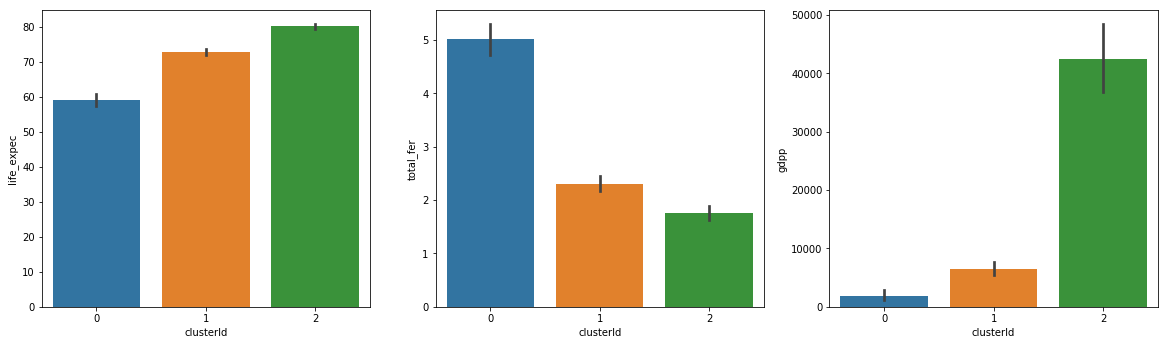

In [56]:
# Create subplots(By default Average)
# increase figure size 
plt.figure(figsize=(20, 12))
# subplot 1
plt.subplot(2, 3, 1)
sns.barplot(x='clusterId', y='life_expec', data=cluster_km3)
# subplot 2
plt.subplot(2, 3, 2)
sns.barplot(x='clusterId', y='total_fer', data=cluster_km3)
# subplot 3
plt.subplot(2, 3, 3)
sns.barplot(x='clusterId', y='gdpp', data=cluster_km3)
plt.show()

#### Filtering out the Data among the Clusters Formed

In [57]:
Filter_0_3 = cluster_km3[cluster_km3['clusterId'].isin(['0'])]
Filter_1_3 = cluster_km3[cluster_km3['clusterId'].isin(['1'])]
Filter_2_3 = cluster_km3[cluster_km3['clusterId'].isin(['2'])]

In [58]:
print(Filter_0_3.shape)
print(Filter_1_3.shape)
print(Filter_2_3.shape)

(47, 12)
(84, 12)
(36, 12)


Based on the visualization above Cluster 2 stands out based on the key attributes 'child_mort', 'exports', 'income', 'life_expec', 'gdpp' which are also the key PCs as shown in the scatter plot

In [59]:
Plot20_3 = Filter_1_3.head(20)

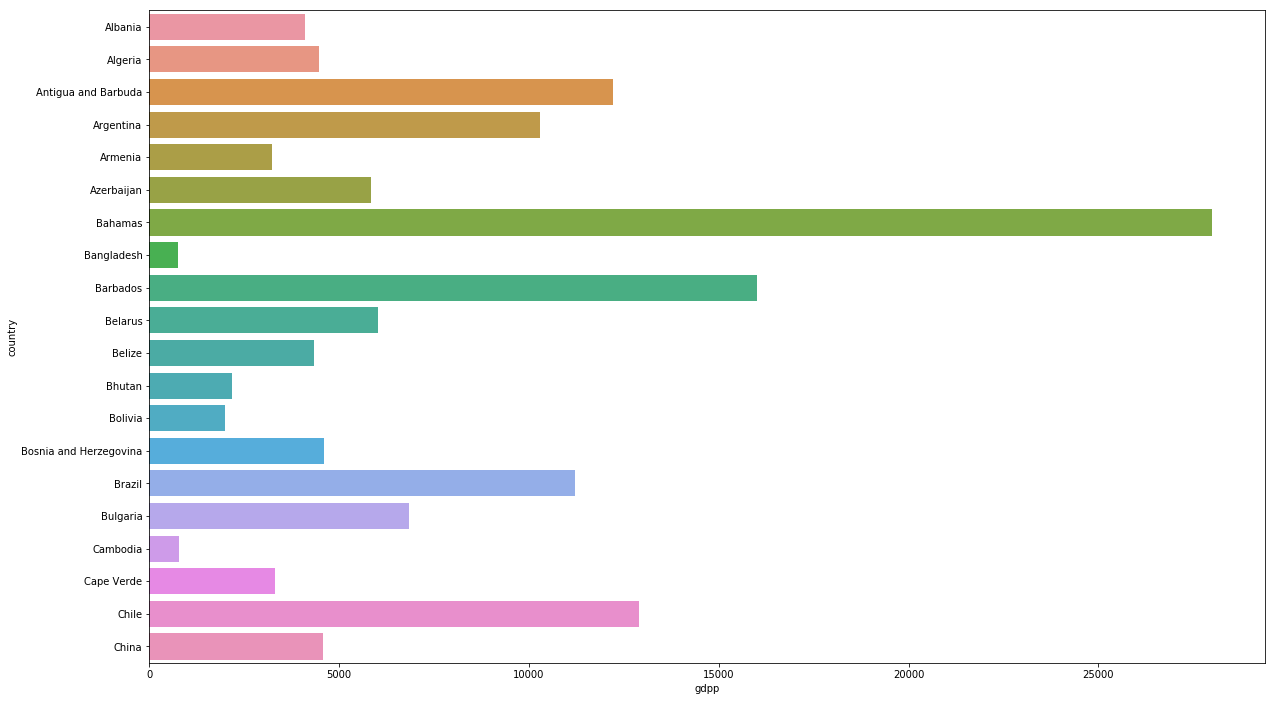

In [60]:
plt.figure(figsize=(20, 12))
sns.barplot(x='gdpp', y='country', data=Plot20_3)
plt.show()

### Heirarchical Clustering

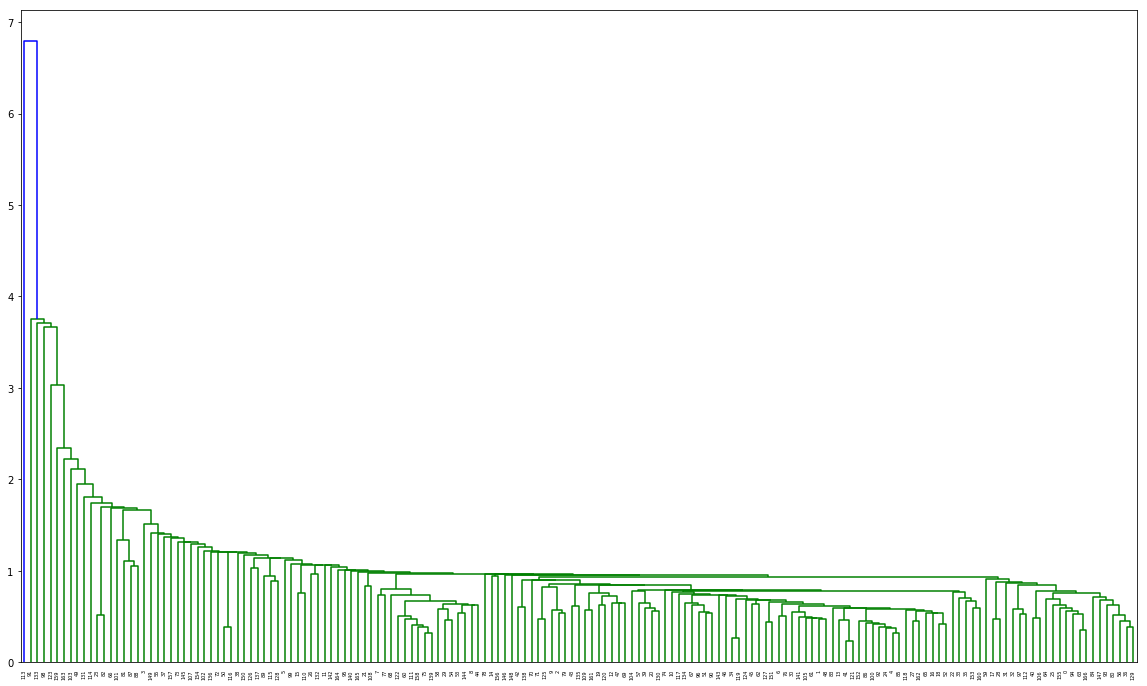

In [61]:
# heirarchical clustering- single
plt.figure(figsize=(20, 12))
mergings = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

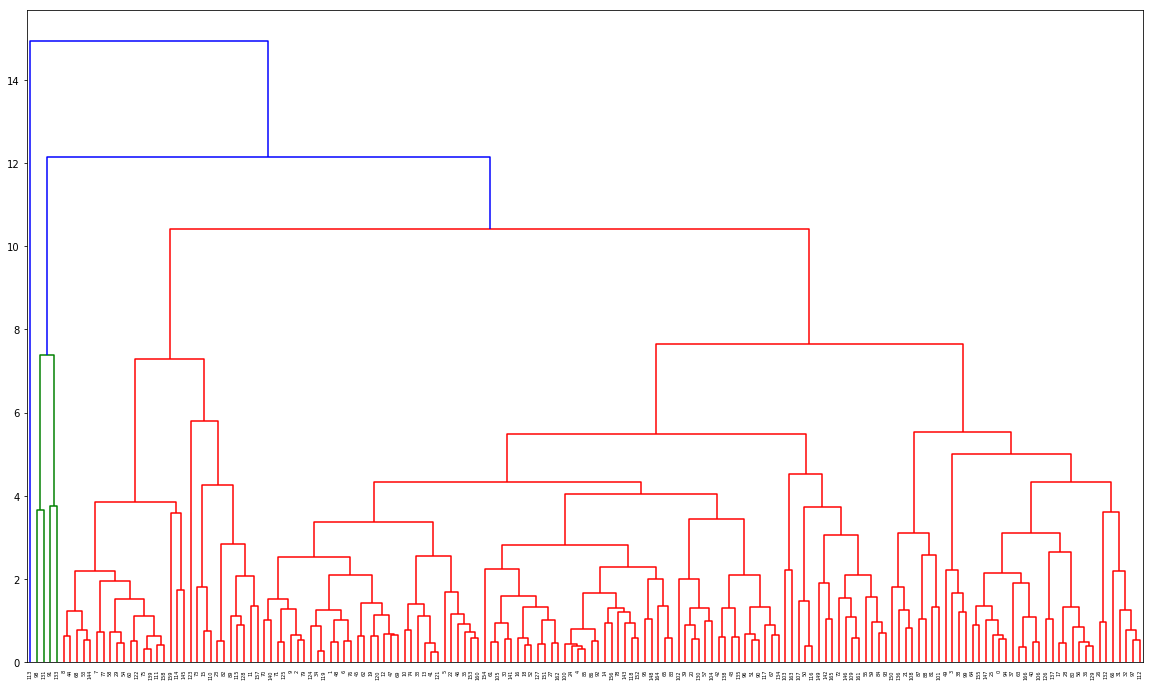

In [62]:
# heirarchical clustering- complete
plt.figure(figsize=(20, 12))
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Analysis of Clusters

In [63]:
clusterCut3 = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
cluster_hc3 = pd.concat([country_data, clusterCut3], axis=1)
cluster_hc3.columns = ['index','country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','clusterId']
cluster_hc3.head()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterId
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


#### Visualizing the Data with the clusters formed

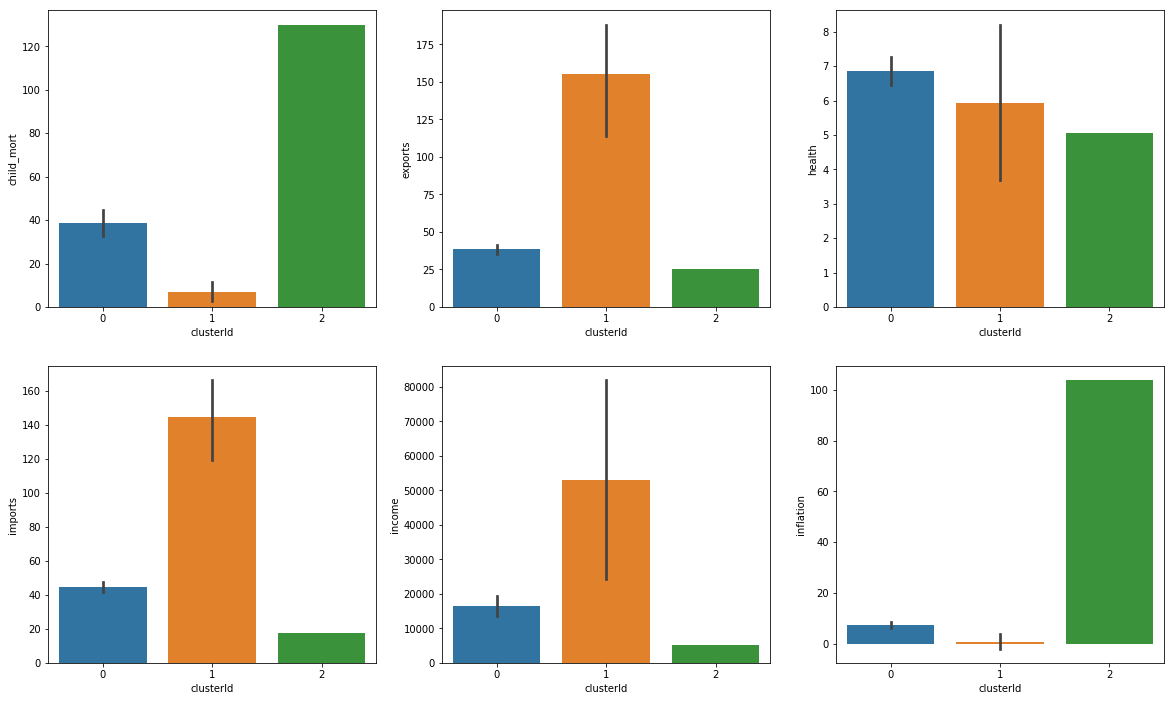

In [64]:
# Create subplots(By default Average)
# increase figure size 
plt.figure(figsize=(20, 12))
# subplot 1
plt.subplot(2, 3, 1)
sns.barplot(x='clusterId', y='child_mort', data=cluster_hc3)
# subplot 2
plt.subplot(2, 3, 2)
sns.barplot(x='clusterId', y='exports', data=cluster_hc3)
# subplot 3
plt.subplot(2, 3, 3)
sns.barplot(x='clusterId', y='health', data=cluster_hc3)
# subplot 4
plt.subplot(2, 3, 4)
sns.barplot(x='clusterId', y='imports', data=cluster_hc3)
# subplot 5
plt.subplot(2, 3, 5)
sns.barplot(x='clusterId', y='income', data=cluster_hc3)
# subplot 6
plt.subplot(2, 3, 6)
sns.barplot(x='clusterId', y='inflation', data=cluster_hc3)
plt.show()

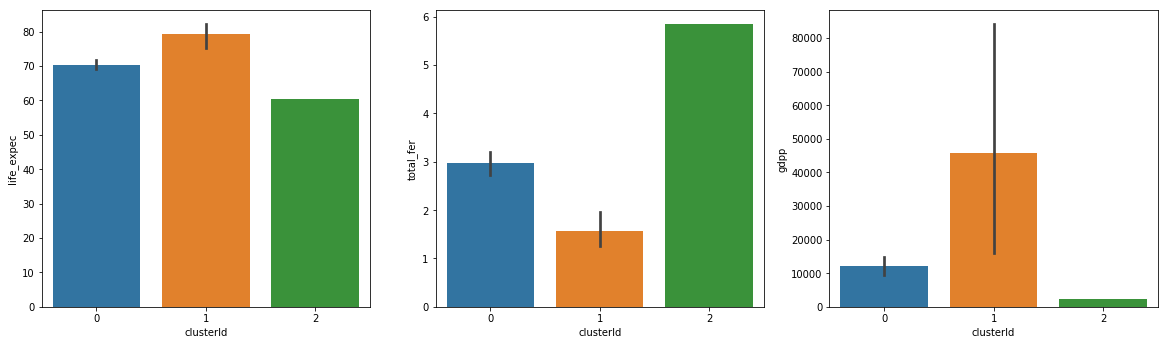

In [65]:
# Create subplots(By default Average)
# increase figure size 
plt.figure(figsize=(20, 12))
# subplot 1
plt.subplot(2, 3, 1)
sns.barplot(x='clusterId', y='life_expec', data=cluster_hc3)
# subplot 2
plt.subplot(2, 3, 2)
sns.barplot(x='clusterId', y='total_fer', data=cluster_hc3)
# subplot 3
plt.subplot(2, 3, 3)
sns.barplot(x='clusterId', y='gdpp', data=cluster_hc3)
plt.show()

#### Filtering out the Data among the Clusters Formed


In [66]:
HC_Filter_0 = cluster_hc3[cluster_hc3['clusterId'].isin(['0'])]
HC_Filter_1 = cluster_hc3[cluster_hc3['clusterId'].isin(['1'])]
HC_Filter_2 = cluster_hc3[cluster_hc3['clusterId'].isin(['2'])]

In [67]:
print(HC_Filter_0.shape)
print(HC_Filter_1.shape)
print(HC_Filter_2.shape)

(162, 12)
(4, 12)
(1, 12)


Based on the visualization above Cluster 2 stands out based on the key attributes 'child_mort', 'exports', 'health', 'import', 'income', 'life_expec', 'gdpp' which are also the key PCs as shown in the scatter plot

In [68]:
Plot20_3_HC = HC_Filter_1.head(20)

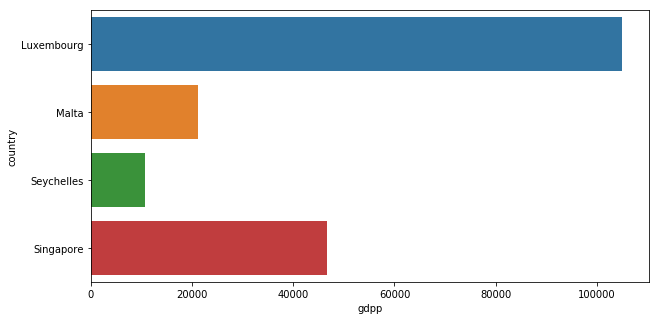

In [72]:
plt.figure(figsize=(10, 5))
sns.barplot(x='gdpp', y='country', data=Plot20_3_HC)
plt.show()

The analysis was done using both K-Means and Hierarchical clustering and based on the visualization and the outcome K-Means should be preferred using 3 as a value of K. Outliers are not treated although it was mentioned but based on the business objective it was assumed that outliers won't affect much on the outcome. 